In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import xarray as xr
import pandas as pd
from acIndUtils import acIndUtils, acIndBVFmapsGraphUtils

**Setting some run parameters**

In [4]:
"""
Loading the perimeter of the area of interest
"""
areaPerimeter = pd.read_csv("areas/areaAdriatic.csv")

In [5]:
"""
Defining names and coordinates of the temporary netcdf and csv files used in this elaboration
"""
rawDataFileSpec = acIndUtils.acNcFileSpec(
    ncFileName="output/Brunt-Vaisala/*_daily_cmems_reanalysis_BV_AdriaticSea.nc", 
    varName="MaxBV", xVarName="lon", yVarName="lat", tVarName="time" )
rawDataFileSpec.printSpec()
ncClippedDataFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="MaxbvfclippedData.nc")
annualMapsNcFileSpec = acIndUtils.acCloneFileSpec(ncClippedDataFileSpec, ncFileName="MaxbvfclippedAnnualMean.nc", tVarName="year")
winterMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="MaxbvfclippedWinterMean.nc")
summerMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="MaxbvfclippedSummerMean.nc")
trendMapNcSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="MaxbvftrendMap.nc")
meanTimeSeriesCsv = "bvfmeanTimeSeries.csv"

  ncFileName: output/Brunt-Vaisala/*_daily_cmems_reanalysis_BV_AdriaticSea.nc
  varName: MaxBV
  xVarName: lon
  yVarName: lat
  zVarName: 
  tVarName: time


**Generating the pre-aggregates**

In [9]:
"""
clipping the input data over the area of interest (may require some time)
"""
clippedData = acIndUtils.acClipDataOnRegion(rawDataFileSpec, areaPerimeter, ncClippedDataFileSpec.ncFileName)

CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7fe8c10723d0>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]


ValueError: ('time', 'lat', 'lon') must be a permuted list of Frozen({'time': 12053, 'depth': 74, 'lat': 146, 'lon': 188}), unless `...` is included

In [8]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerateAnnualMeanMaps(ncClippedDataFileSpec, annualMapsNcFileSpec.ncFileName)
print("done")

done


In [59]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerateSeasonalWinter(ncClippedDataFileSpec, winterMapsNcFileSpec.ncFileName)
print("done")

done


In [60]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerateSeasonalSummer(ncClippedDataFileSpec, summerMapsNcFileSpec.ncFileName)
print("done")

done


In [61]:
"""
Generating the temporary csv file with the daily time series
"""
clippedData1Dcsv = acIndUtils.acGenerateMeanTimeSeries(ncClippedDataFileSpec, meanTimeSeriesCsv)
print("done")

done


In [62]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope2DMap(annualMapsNcFileSpec, trendMapNcSpec.ncFileName, smoothingKernelSide=4)
print("done")

done


**Generating the plots**

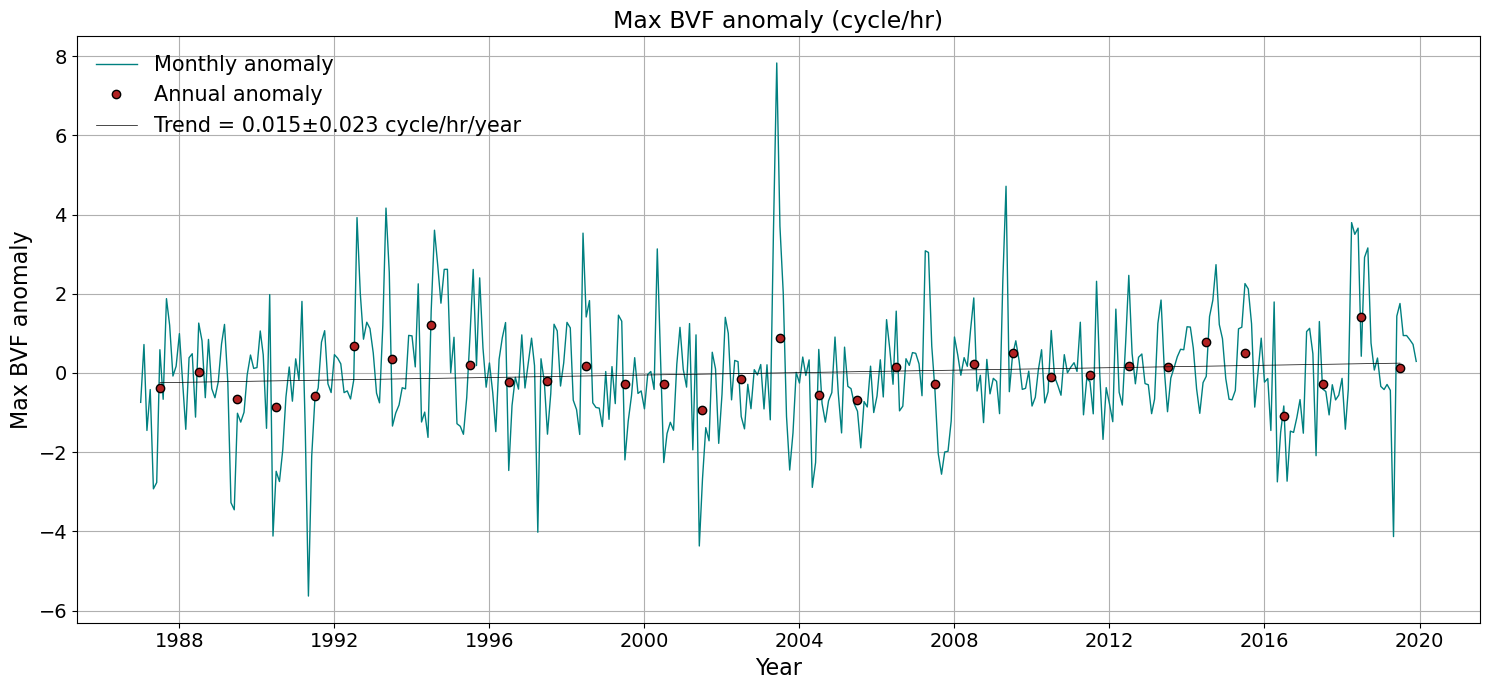

In [15]:
"""
Time series of Max values of Brunt-Vaisala Frequency.
"""
figSSTTimeSeries = acIndBVFmapsGraphUtils.acPlotMBVFTimeSeries(meanTimeSeriesCsv)

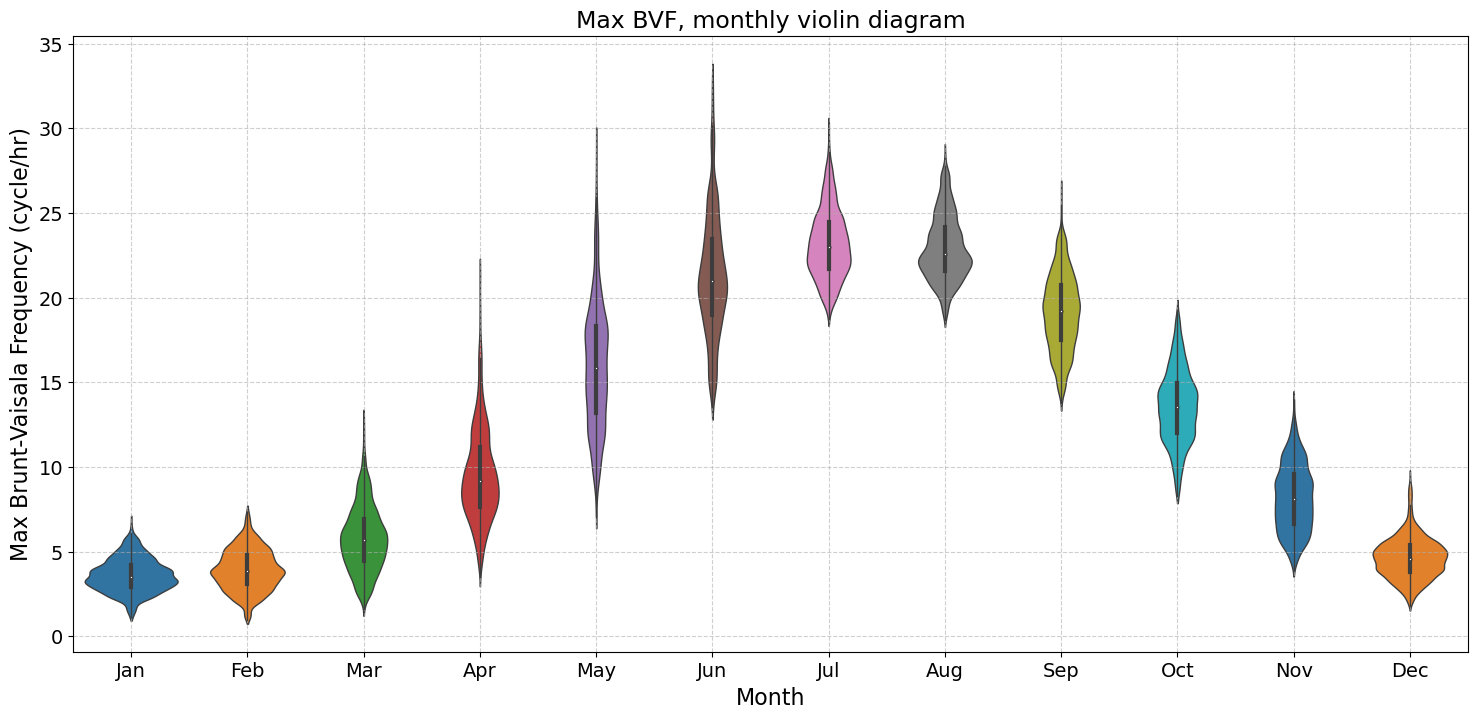

In [39]:
"""
Violin diagram: for each month shows the distribution of max SST across the whole time extent of the dataset
"""
figSSTViolinPlot = acIndBVFmapsGraphUtils.acSSTViolinPlot(meanTimeSeriesCsv)

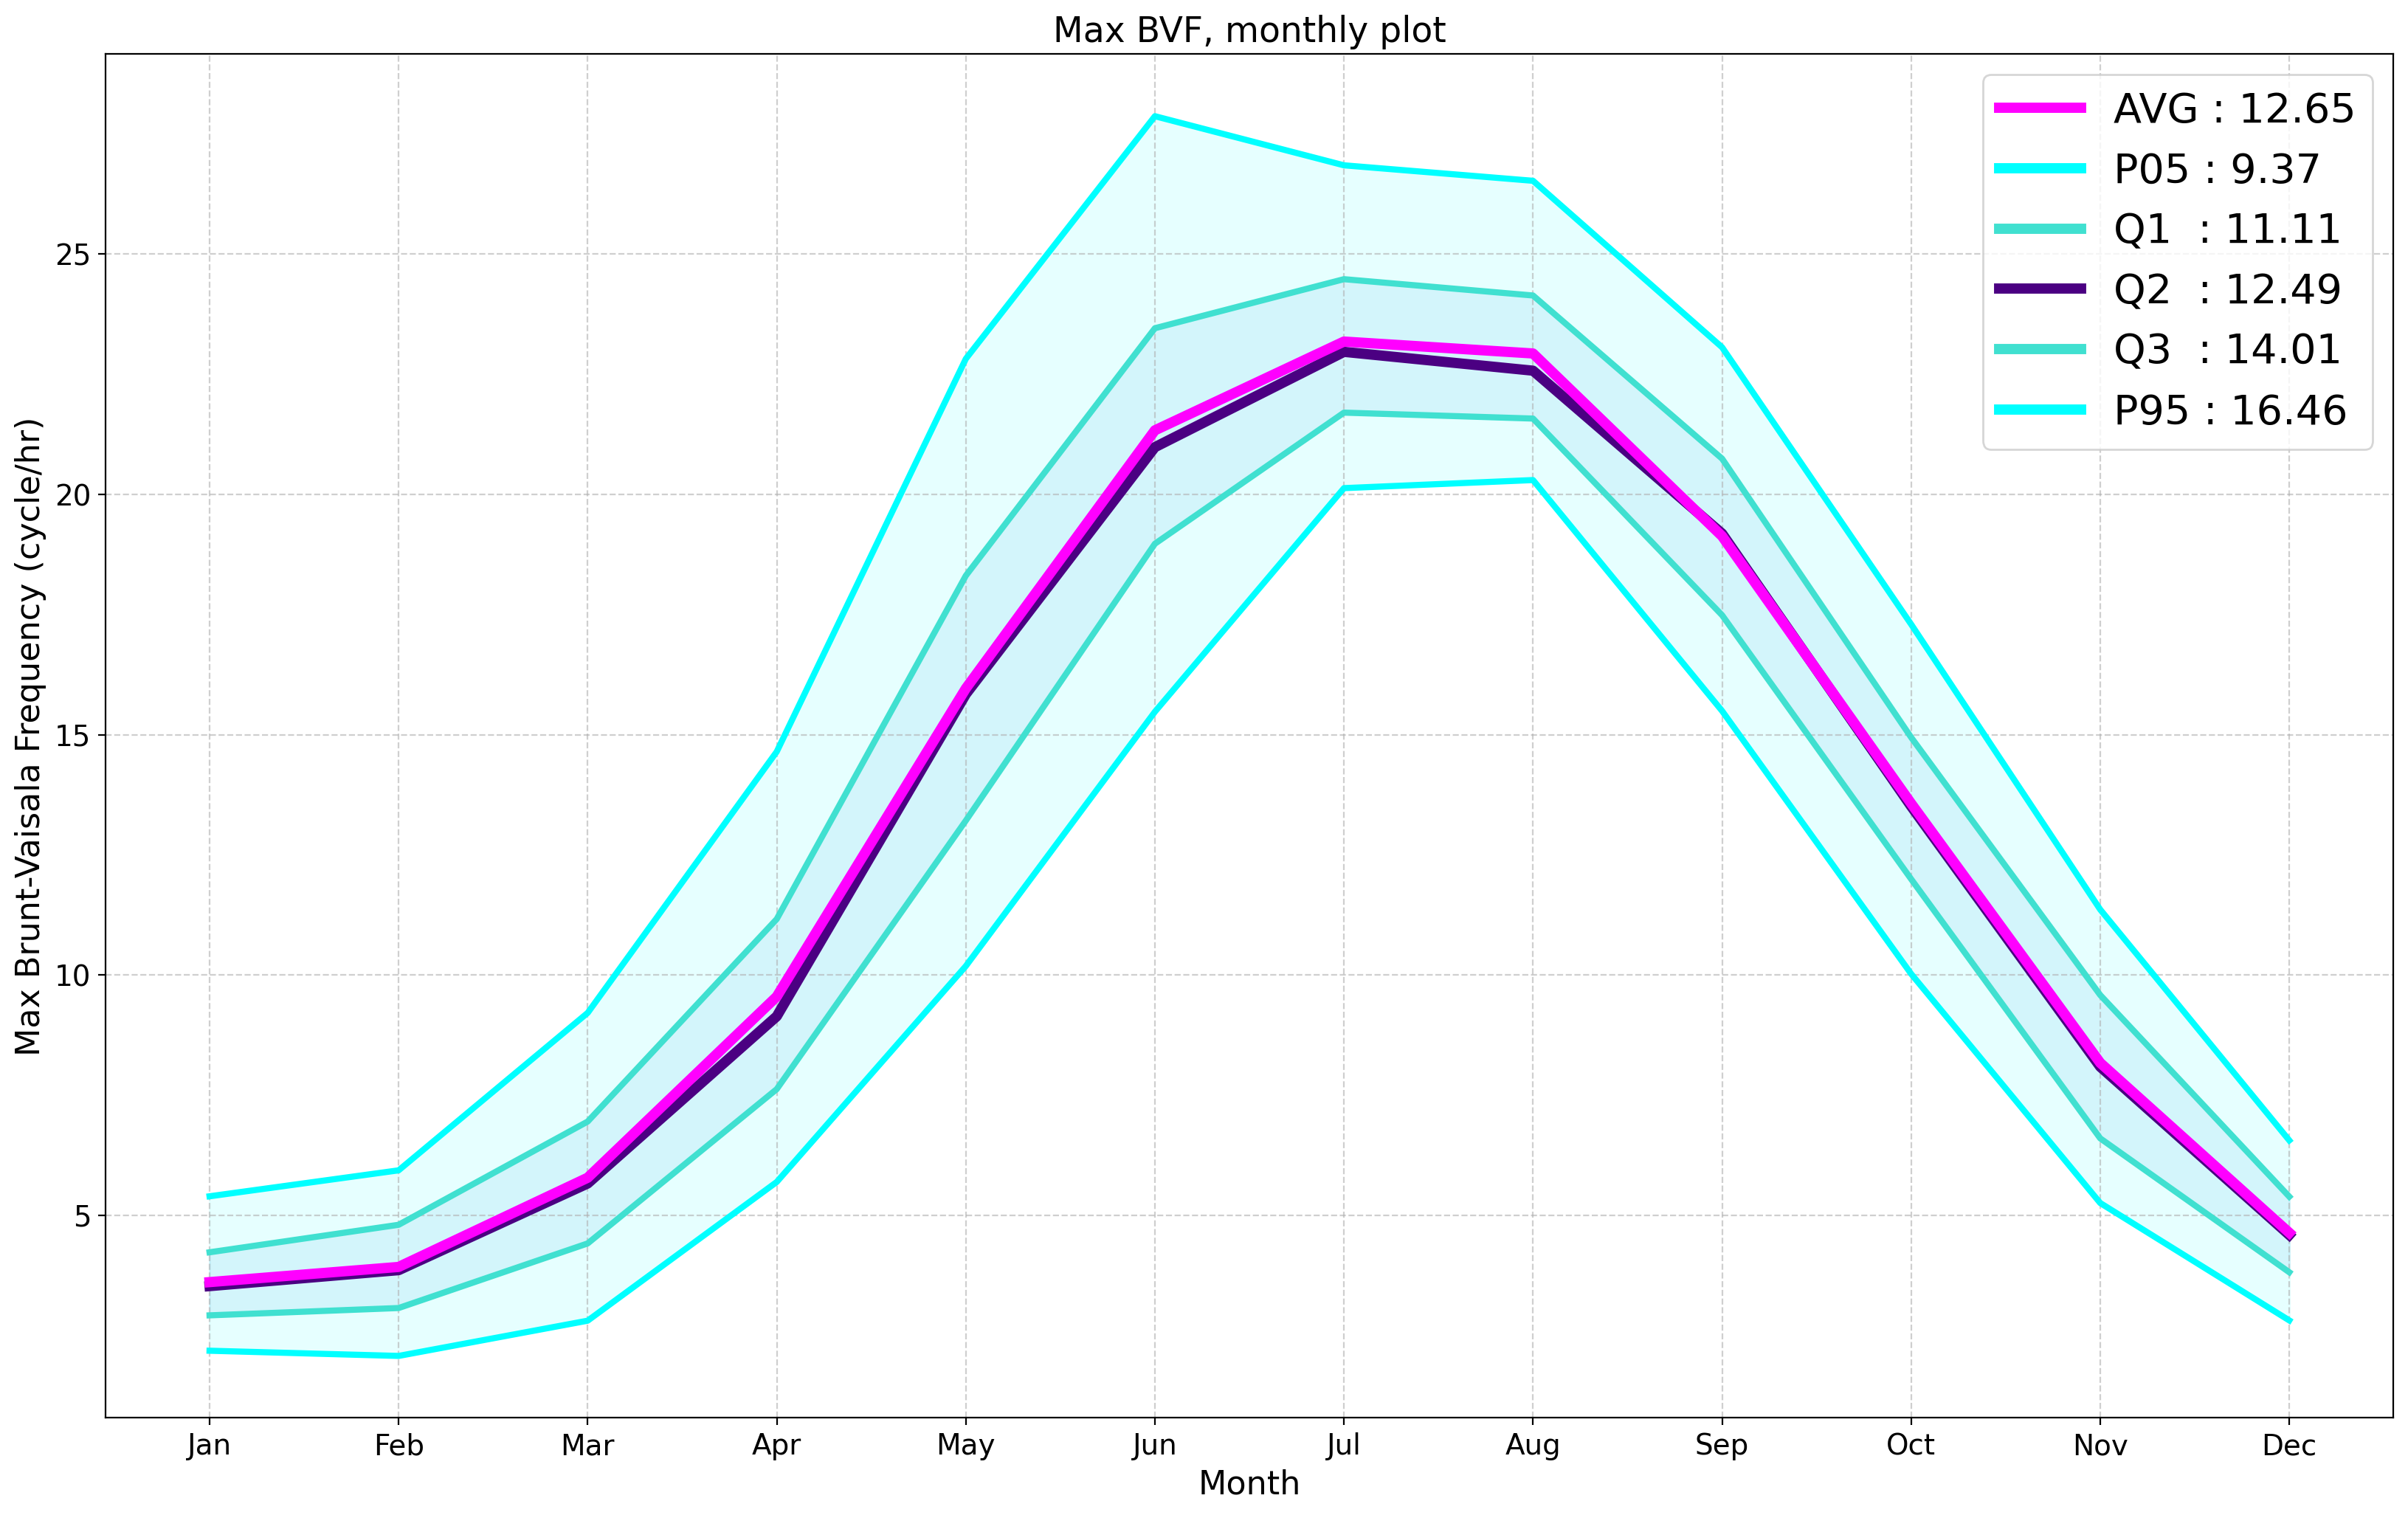

In [257]:
"""
LinePlot diagram: for each month shows mean and percentiles across the whole time extent of the dataset
"""
pathAC="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/MAXBVF_Annual_Cycle.csv"
figAnnualCyclePlot = acIndBVFmapsGraphUtils.acAnnualCyclePlot(meanTimeSeriesCsv,tocsv=True,csvpth=pathAC) 

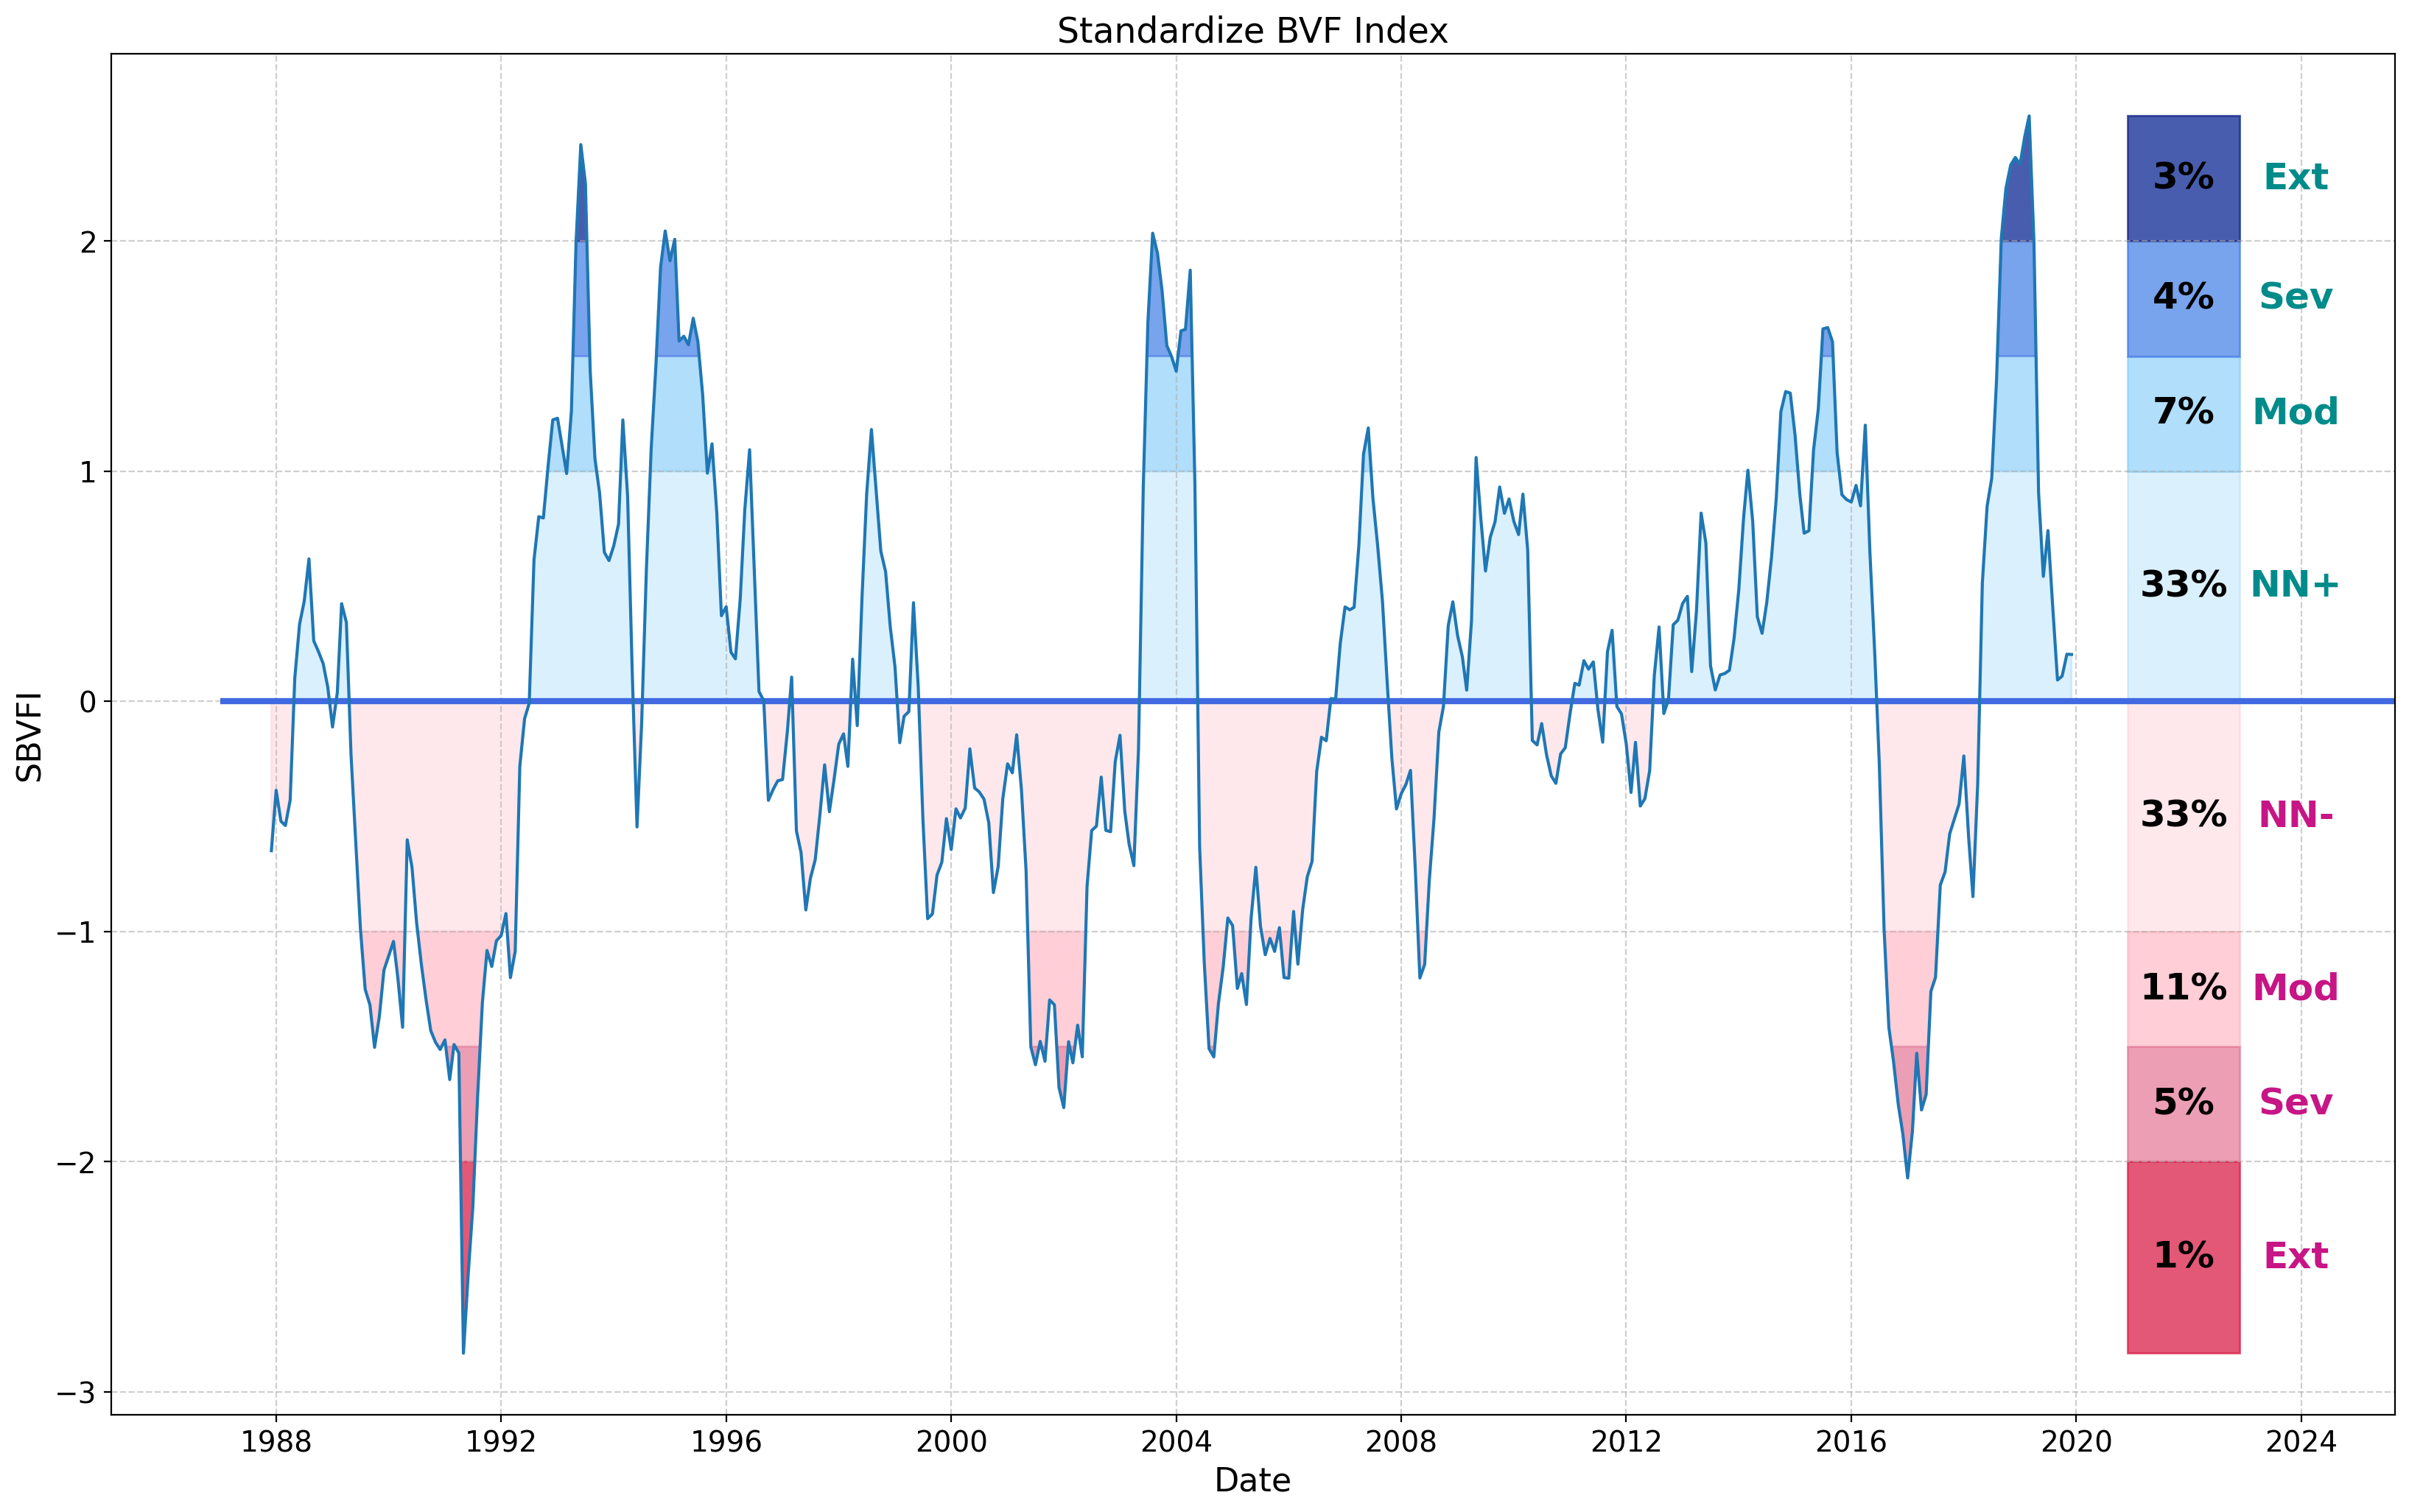

In [256]:
"""
Plot Standardize Brunt-Vaisala Frequency Index
"""
SBVFIcsv="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/SBVFI/SFI.csv"

figSBVFIplot = acIndBVFmapsGraphUtils.acSBVFIplot(SBVFIcsv)

MeanMaxBVF.nc has been processed to csv and saved to :-/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/uncleaned_MeanMaxBVF.csv
MeanMaxBVF.nc has been cleaned and saved to :- /Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/cleaned_MeanMaxBVF.csv
Progress: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete


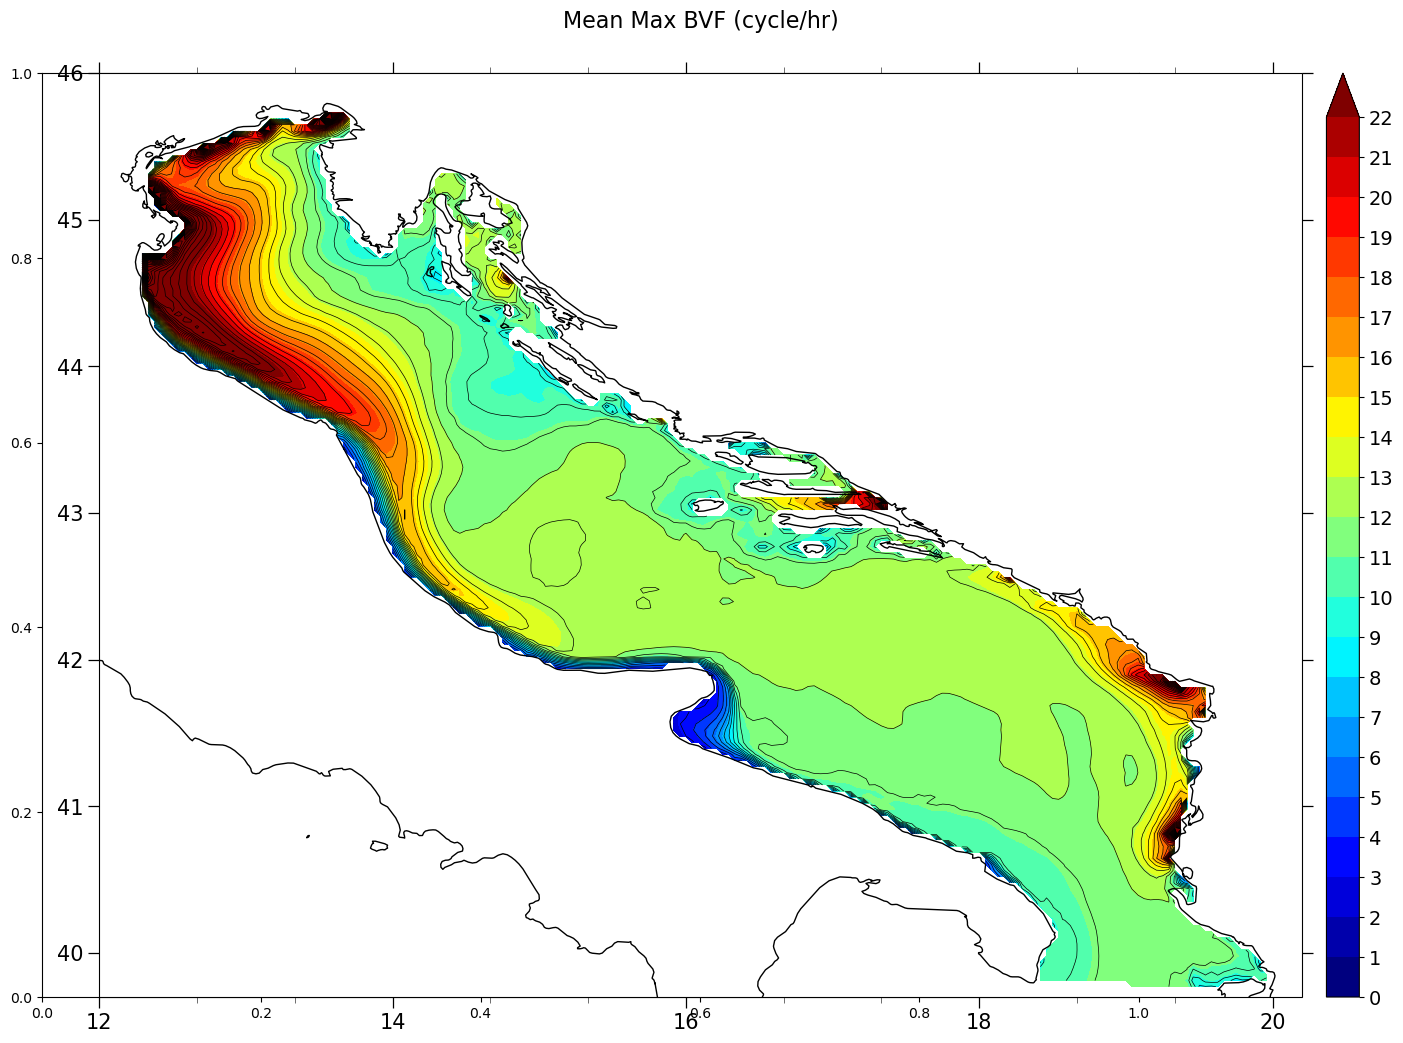

In [118]:
"""
Mean map of Max BVF
"""
outpth="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/"
meanNC="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/MeanMaxBVF.nc"

MeanPlot = acIndBVFmapsGraphUtils.plotMeanMap(annualMapsNcFileSpec, "Mean Max BVF (cycle/hr)",NCmean=meanNC,tocsv=True, csvpath=outpth)


WinterMean.nc has been processed to csv and saved to :-/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/uncleaned_WinterMean.csv
WinterMean.nc has been cleaned and saved to :- /Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/cleaned_WinterMean.csv
Progress: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete


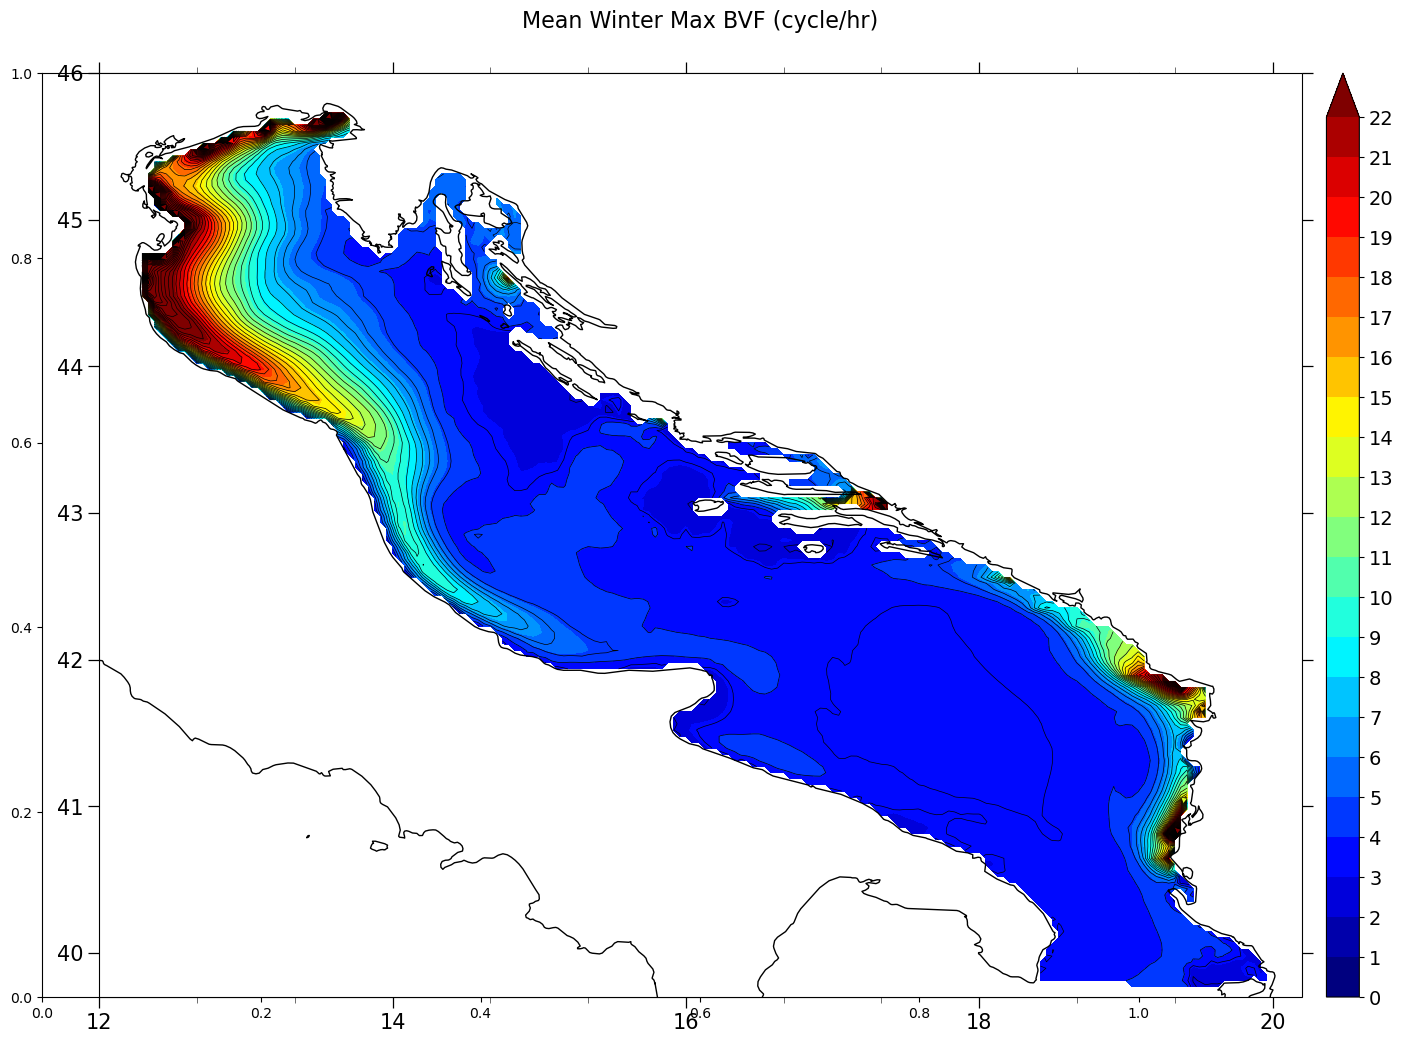

In [258]:
"""
Map of Winter mean Max BVF. Season defined as in Artegiani et al. 1997 (JFMA).
"""

outpth="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/"
meanNC="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/WinterMean.nc"

winterPlot = acIndBVFmapsGraphUtils.plotMeanMap(winterMapsNcFileSpec, "Mean Winter Max BVF (cycle/hr)",NCmean=meanNC,tocsv=True, csvpath=outpth)   

SummerMean.nc has been processed to csv and saved to :-/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/uncleaned_SummerMean.csv
SummerMean.nc has been cleaned and saved to :- /Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/cleaned_SummerMean.csv
Progress: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete


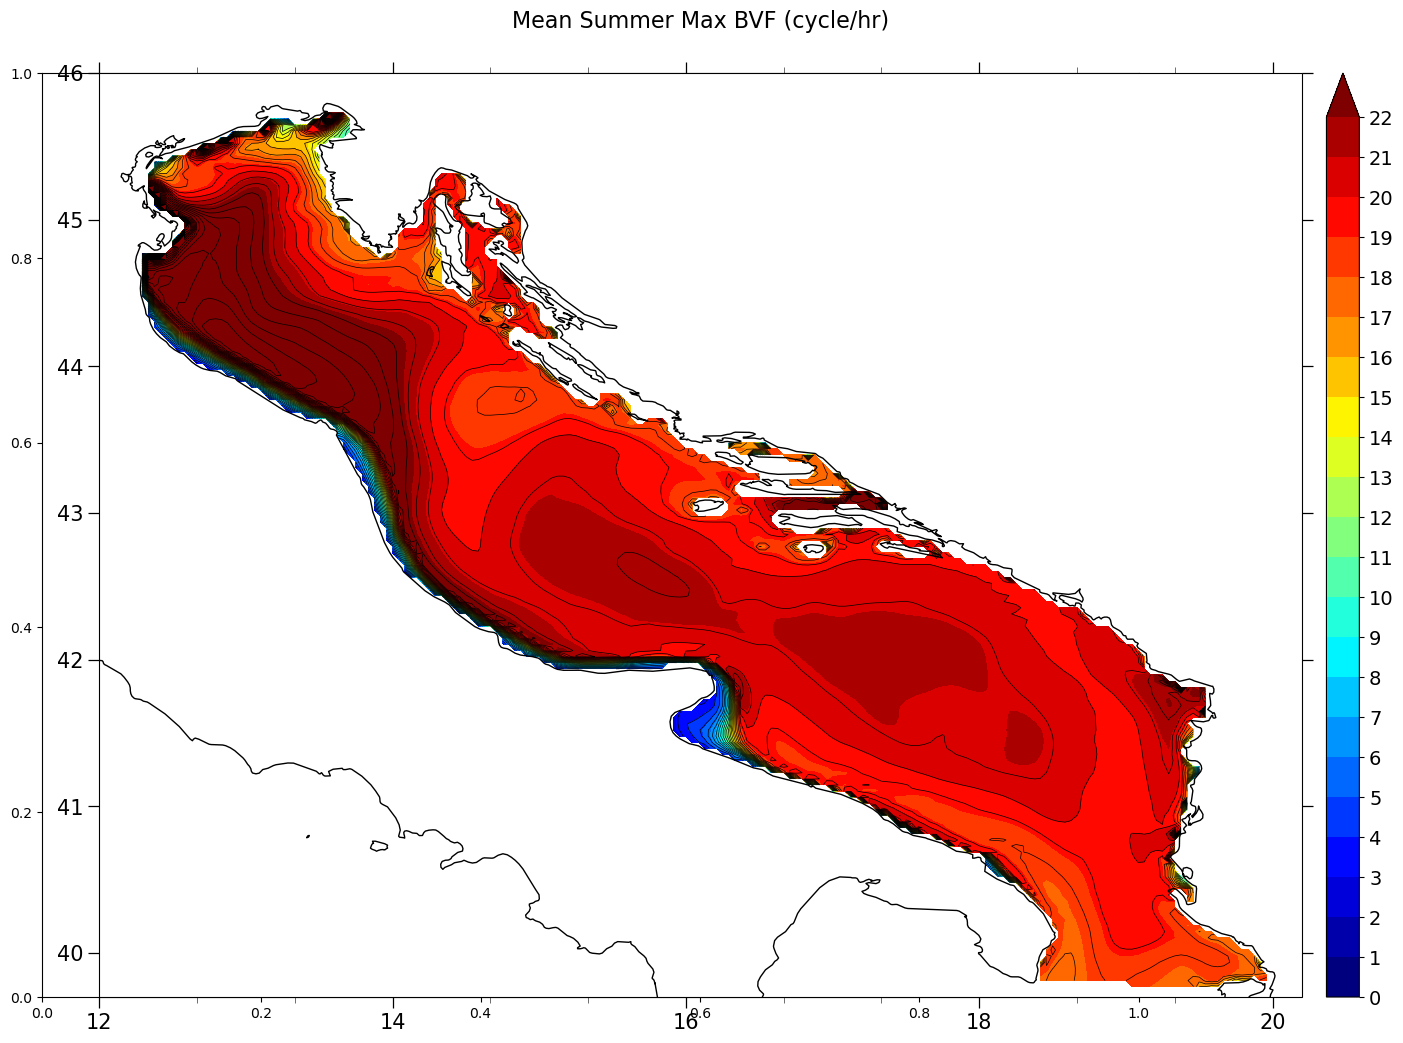

In [24]:
"""
Map of Summer mean Max BVF. Season defined as in Artegiani et al. 1997 (JASO).
"""
outpth="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/"
meanNC="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/SummerMean.nc"

winterPlot = acIndBVFmapsGraphUtils.plotMeanMap(summerMapsNcFileSpec, "Mean Summer Max BVF (cycle/hr)",NCmean=meanNC,tocsv=True, csvpath=outpth) 

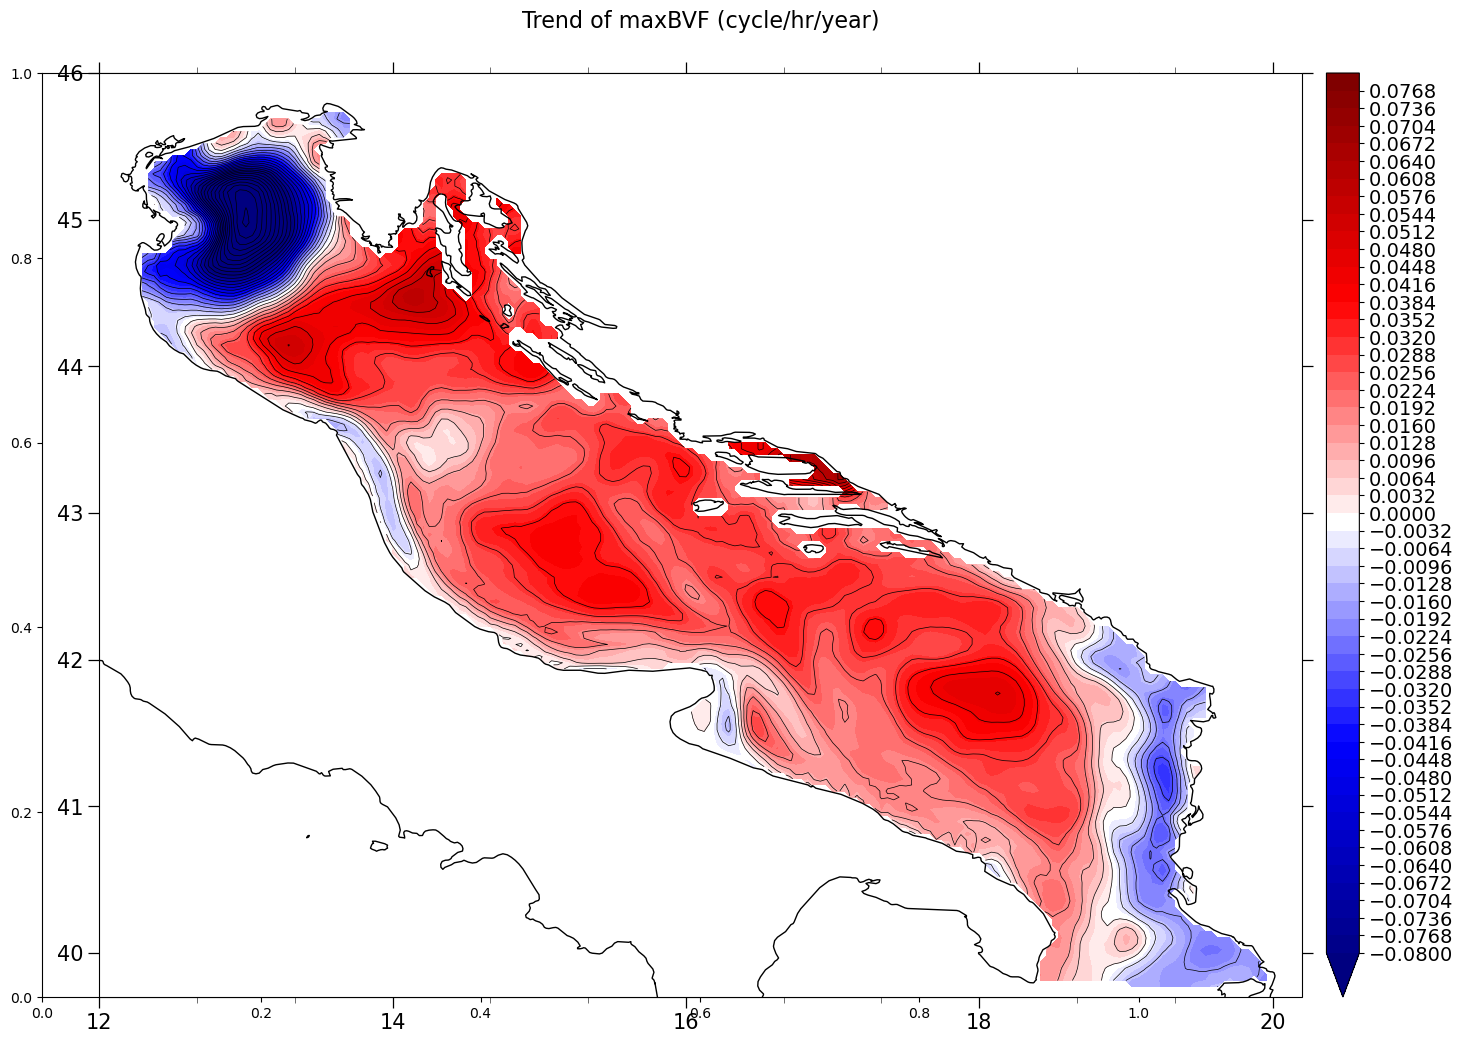

In [88]:
# effettuare smoothing spaziale
trendMapPlot = acIndBVFmapsGraphUtils.plotTrendMap(trendMapNcSpec)